Import the libraries needed

In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Load data and store in dataframe

In [662]:
df1=pd.read_csv('dvi-a20ps10-data2.csv')
df2=pd.read_csv('dvi-a2-ps10-data1.csv')

In [663]:
print(f'{df1.shape}')
print(f'{df2.shape}')

(636, 18)
(150460, 21)


In [664]:
# Display First ten items from both the input files
df1.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [665]:
df2.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [666]:
# Check for NULL values and Replace Nan with 0 (For both files)
df1.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [667]:
df2.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [668]:
df1=df1.fillna(0)
df2=df2.fillna(0)

In [669]:
print(f'{df1.isna().sum()}')

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [670]:
print(f'{df2.isna().sum()}')

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [671]:
#Display an overview - The participating teams and the unique venues used for matches, and the number of matches played 

In [672]:
teams=df1['team1'].unique()
venues=df1['venue'].unique()
df = pd.merge(df2,df1[{'id','season'}],left_on = 'match_id',right_on='id')
unique_matches_df=df['match_id'].unique()

In [673]:
print(f'Partispating teams from 2008-2017 ipl seasons :\n{teams}')

Partispating teams from 2008-2017 ipl seasons :
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


In [674]:
print(f'Unique venues used for the matches:\n{venues}')

Unique venues used for the matches:
['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 '

In [675]:
print(f'Number of matches played in 2008-2017 ipl seasons:\n{len(unique_matches_df)}')

Number of matches played in 2008-2017 ipl seasons:
636


### Query 1
<h4>Identify the top 10 batsmen of all time by considering how does these players score runs.  <br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.


In [676]:
players = df2.batsman.unique()

In [677]:
class Batsman():
    batsman_df = pd.DataFrame(columns=['player_name','total_runs','outs','balls_played','average_runs','strike_rate'])
    def __init__(self,players,deliveries_df):
        self.players = players
        self.df = deliveries_df.copy()
        
    def create_df(self):
        for player in self.players:
            run = int(self.df[self.df["batsman"] == player].batsman_runs.sum())
            balls = int((self.df["batsman"] == player).sum())
            out = int((self.df["player_dismissed"] == player).sum())
            try:
                avg_run = run/out # average runs = Total runs divided by total outs
            except:
                avg_run = 0
            try:
                strk_rate = (run * 100)/balls # strike rate = run scored per 100 balls
            except:
                strk_rate = 0
            df2 = {'player_name':player,'total_runs': int(run),'outs':int(out),'balls_played': int(balls),'average_runs':avg_run,'strike_rate': strk_rate}
            self.batsman_df = self.batsman_df.append(df2,ignore_index =True)
        return self.batsman_df

In [678]:
batsman_df = Batsman(players,df2).create_df()

In [679]:
batsman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 6 columns):
player_name     461 non-null object
total_runs      461 non-null object
outs            461 non-null object
balls_played    461 non-null object
average_runs    461 non-null float64
strike_rate     461 non-null float64
dtypes: float64(2), object(4)
memory usage: 21.7+ KB


In [680]:
# We can see that the total_runs, outs,balls_played column is not integer type,so let's convert it to integer first.
batsman_df = batsman_df.astype({'total_runs':int,'outs':int,"balls_played":int})

#### Top 10 players in the basis of runs scored from 2008-2017 ipl seasons.

In [681]:
highest_run = batsman_df.sort_values('total_runs',ascending = False).head(10)
highest_run 

,player_name,total_runs,outs,balls_played,average_runs,strike_rate
33,SK Raina,4548,134,3369,33.940299,134.995548
87,V Kohli,4423,118,3494,37.483051,126.588437
19,RG Sharma,4207,129,3274,32.612403,128.497251
36,G Gambhir,4132,131,3433,31.541985,120.361200
0,DA Warner,4014,100,2902,40.140000,138.318401
64,RV Uthappa,3778,128,2960,29.515625,127.635135
6,CH Gayle,3651,89,2532,41.022472,144.194313
1,S Dhawan,3561,109,3005,32.669725,118.502496
30,MS Dhoni,3560,94,2680,37.872340,132.835821
71,AB de Villiers,3486,91,2402,38.307692,145.129059


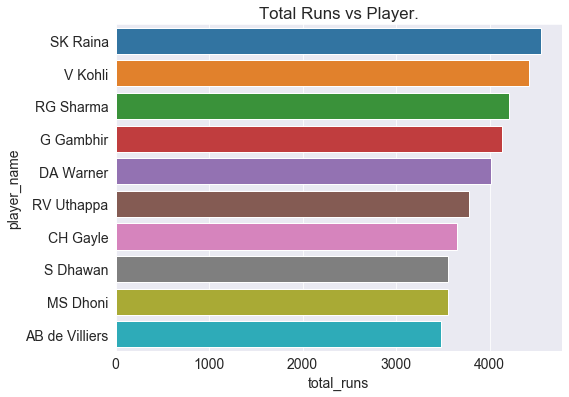

In [682]:
plt.figure(figsize=(8,6))
plt.title("Total Runs vs Player.")
sns.barplot(x=highest_run.total_runs,y=highest_run.player_name)

### Query 2
<h4>The general notion in cricket is, Win the toss to win the match . To verify the general notion, perform a match winning analysis based on the toss winners.<br>
    

In [683]:
# Here some team names have changed over the period of the IPL season
# Rising Pune Supergiants : Rising Pune Supergiant
# Delhi Daredevils : Delhi Capitals

df1.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
df1.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
df1.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [684]:
# Does Winning toss play a role in winning the match?
# Lets observe the dataframe df1
# We will compare how many teams won after winning toss and how many teams lost after winning the toss.

won= 0
lost=0
for ind in df1.index:
    if df1['toss_winner'][ind] == df1['winner'][ind]:
        won+=1
    else:
        lost+=1   

In [685]:
print(f'There are {won} matches in the IPL played till 2017 now where toss winner is the winner of the match')

There are 289 matches in the IPL played till 2017 now where toss winner is the winner of the match


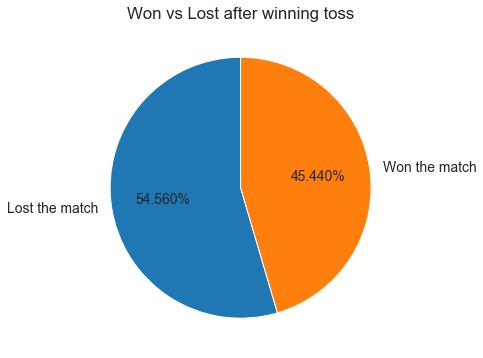

In [686]:
plt.figure(figsize=(8,6))
plt.title("Won vs Lost after winning toss")
plt.pie((lost,won), labels=("Lost the match","Won the match"), autopct='%1.3f%%', startangle=90);

### Query 3
<h4>Are T20 formats batsmen friendly? To identify this, Do an analysis to find out the average runs scored per match across the seasons. <br>



In [687]:
batsmen = df1[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=df1.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']

In [688]:
avgruns_each_season

,season,matches,total_runs,average_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


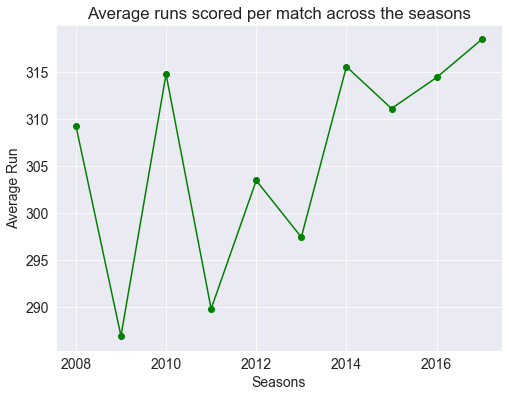

In [689]:
plt.figure(figsize=(8,6))
plt.title('Average runs scored per match across the seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Run')
plt.plot(avgruns_each_season['season'], avgruns_each_season['average_runs_per_match'],marker='o',color='g')

### Query 4
<h4>Create an interactive visual to identify the most player-of-the-matches award. <br>



Here are top 10 list of batsman who have won most man of the match awards in 2008 to 2017 ipl.

In [690]:
man_of_match_df = df1.groupby('player_of_match')[['id']].count()
man_of_match_df = man_of_match_df.sort_values('id',ascending = False).head(10)
man_of_match_df.rename(columns = {'id':'No_of_Awards'},inplace= True)
man_of_match_df

,No_of_Awards
player_of_match,
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
G Gambhir,13
MS Dhoni,13
MEK Hussey,12


Text(0, 0.5, 'No. of Awards')

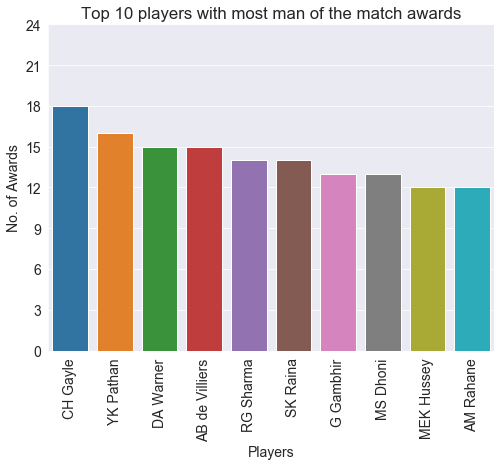

In [691]:
plt.figure(figsize=(8,6))
sns.barplot(x=man_of_match_df.index,y=man_of_match_df.No_of_Awards)
plt.title("Top 10 players with most man of the match awards")
plt.xticks(rotation=90)
plt.yticks(ticks = np.arange(0,25,3))
plt.xlabel('Players')
plt.ylabel('No. of Awards')

### Query 5
<h4>Prepare a tabular visual to identify teams scoring more than 225 runs.<br>


In [692]:
# creating df having total runs per team per innings in 2008-2017 ipl seasons.
unique_matches = df2.match_id.unique()

In [693]:
class Process():
    team_runs_df = pd.DataFrame(columns = ['match_id','inning','team_name','extra_runs','total_runs','players_dismissed'])
    def __init__(self,unique_matches,deliveries_df):
        self.unique = unique_matches
        self.df = deliveries_df
        self.create_df()
        
    def create_df(self):
        for m_id in self.unique:
            if m_id in self.team_runs_df["match_id"]:
                temp = self.team_runs_df[self.team_runs_df["match_id"] == m_id].inning
                if 1 in temp and 0 in temp:
                    continue
            match_df = self.df[self.df['match_id'] == m_id].copy()
            team1 = match_df[match_df['inning'] == 1].copy()
            team2 = match_df[match_df['inning'] == 2].copy()
            i=0
            for team in team1,team2:
                runs = team['total_runs'].sum()
                wickets = team['player_dismissed'].notnull().sum()
                extras = team['extra_runs'].sum()
                te = team.batting_team.unique() 
                if len(te) > 0:
                    te = te[0]
                df2 = {'match_id': m_id,'inning' : i+1,'team_name' : te,'extra_runs' : extras ,'total_runs' : runs,'players_dismissed' : wickets}
                i+=1
                self.team_runs_df = self.team_runs_df.append(df2,ignore_index = True)
                
    def get_team_stats(self):
        return self.team_runs_df

In [694]:
obj = Process(unique_matches,df2)
team_stats_df = obj.get_team_stats()

In [695]:
teams_score_more_225=team_stats_df[team_stats_df['total_runs']>=225]

In [696]:
teams_score_more_225

,match_id,inning,team_name,extra_runs,total_runs,players_dismissed
98,50,1,Kings XI Punjab,10,230,129
120,61,1,Chennai Super Kings,6,240,124
410,206,1,Chennai Super Kings,6,246,122
516,259,1,Delhi Daredevils,16,231,126
590,296,1,Kings XI Punjab,27,232,126
820,411,1,Royal Challengers Bangalore,11,263,128
970,486,1,Kings XI Punjab,10,231,125
1030,516,1,Kings XI Punjab,11,226,129
1112,557,1,Royal Challengers Bangalore,11,226,128
1122,562,1,Royal Challengers Bangalore,7,235,125


In [697]:
print('Number of teams which have scored 225 and more in an innings:'
      ,len(teams_score_more_225['team_name'].unique()))

Number of teams which have scored 225 and more in an innings: 4


In [698]:
teams_score_more_225 = teams_score_more_225.astype({'total_runs':int}) # converting object data tyoe to int data type

In [699]:
teams_score_max_beyond_225=pd.pivot_table(teams_score_more_225, values = 'total_runs',
                                 index = ['team_name'],aggfunc=max)

In [700]:
teams_score_max_beyond_225

,total_runs
team_name,
Chennai Super Kings,246
Delhi Daredevils,231
Kings XI Punjab,232
Royal Challengers Bangalore,263


Text(0, 0.5, 'Total runs')

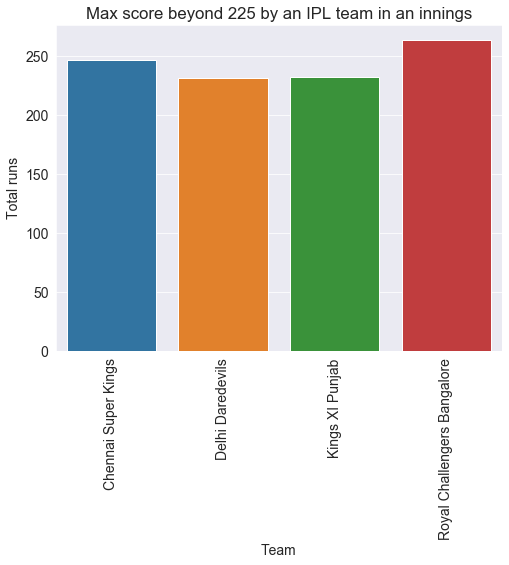

In [701]:
plt.figure(figsize=(8,6))
sns.barplot(x=teams_score_max_beyond_225.index,y=teams_score_max_beyond_225.total_runs)
plt.title("Max score beyond 225 by an IPL team in an innings")
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total runs')

## Query 6 

<h4>Who are the top 10 on field umpires to look over maximum number of matches in ipl during 2008-2017<br>
    
    

On-field umpire is an umpire that stays on the field to judge a game instantly, the 3rd umpire looks over the game from outside the field using a computer screen whereas umpire1 and umpire2 do most of the work within the game.

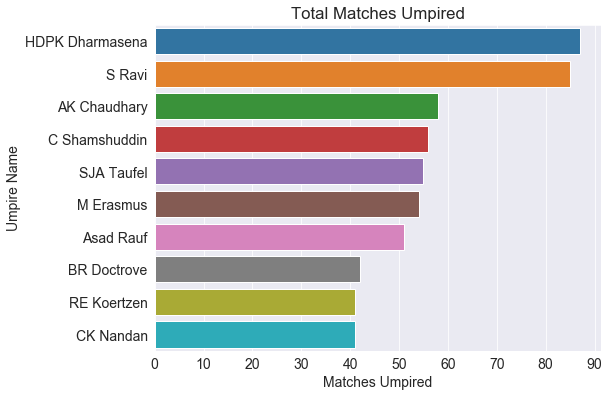

In [702]:
umpires_count = dict(Counter(df1.umpire1)+Counter(df1.umpire2)) 
umpire_df = pd.DataFrame(columns = {"Umpire Name","Matches Umpired"})
for umpire in umpires_count:
    umpire_df = umpire_df.append({"Umpire Name":umpire,"Matches Umpired":umpires_count[umpire]},ignore_index = True)
umpire_df.sort_values("Matches Umpired",inplace=True,ascending = False)
plt.figure(figsize=(8,6))
plt.title("Total Matches Umpired")
plt.xticks(range(0,120,10))
sns.barplot(x=umpire_df["Matches Umpired"],y= umpire_df["Umpire Name"].head(10))